In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8533 non-null   object 
 1   Date_of_Journey  8533 non-null   object 
 2   Source           8533 non-null   object 
 3   Destination      8533 non-null   object 
 4   Dep_Time         8533 non-null   object 
 5   Arrival_Time     8533 non-null   object 
 6   Duration         8533 non-null   object 
 7   Total_Stops      8533 non-null   object 
 8   Additional_Info  8533 non-null   object 
 9   Price            8533 non-null   float64
dtypes: float64(1), object(9)
memory usage: 666.8+ KB


In [4]:
df["Duration"].value_counts()

2h 50m     432
1h 30m     312
2h 55m     282
2h 35m     271
2h 45m     263
          ... 
5m           1
30h          1
13h 35m      1
42h 5m       1
42h 45m      1
Name: Duration, Length: 364, dtype: int64

In [5]:
df.dropna(inplace=True) ## dropping the nan values

In [6]:
df.isnull().sum() ##no nan values are present now.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# **EDA**

In [7]:
##since date of journey is a object type ,we have to convert it to datetime format and extract the day and month because timestamps cant be used to train our data.
df["Journey_day"] = pd.to_datetime(df['Date_of_Journey']).dt.day

In [8]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"]).dt.month

In [9]:
df['journey_day_of_week'] = pd.to_datetime(df["Date_of_Journey"]).dt.dayofweek

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,journey_day_of_week
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0,4,9,2
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0,6,3,2
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0,6,9,4
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0,27,5,0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0,6,6,3


In [11]:
##since i have extracted the day an the month , i can drop this column to reduce the noise in my dataset.
df.drop(columns=["Date_of_Journey"], axis = 1, inplace = True)

In [12]:
 # im extracting the hour and minute from dep_time similar to that what i have done with date of journey

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [13]:
# Now i can drop Dep_Time as it is of no use since i have extracted the features from it.
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min
0,IndiGo,Banglore,Delhi,06:50,2h 50m,non-stop,No info,3943.0,4,9,2,4,0
1,IndiGo,Banglore,Delhi,11:20,2h 50m,non-stop,No info,4823.0,6,3,2,8,30
2,Jet Airways,Mumbai,Hyderabad,21:05,1h 30m,non-stop,In-flight meal not included,3210.0,6,9,4,19,35
3,Multiple carriers,Delhi,Cochin,21:00,8h 10m,1 stop,No info,7005.0,27,5,0,12,50
4,Air India,Delhi,Cochin,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0,6,6,3,6,50


In [15]:
#doing similarly as done above with the arrival time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Now i can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,3943.0,4,9,2,4,0,6,50
1,IndiGo,Banglore,Delhi,2h 50m,non-stop,No info,4823.0,6,3,2,8,30,11,20
2,Jet Airways,Mumbai,Hyderabad,1h 30m,non-stop,In-flight meal not included,3210.0,6,9,4,19,35,21,5
3,Multiple carriers,Delhi,Cochin,8h 10m,1 stop,No info,7005.0,27,5,0,12,50,21,0
4,Air India,Delhi,Cochin,24h 50m,2 stops,No info,13381.0,6,6,3,6,50,7,40


In [17]:
#  Departure Time - Arrival time = Duration
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
 #Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [19]:
df.drop(["Duration"], axis = 1, inplace = True)

In [20]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,No info,3943.0,4,9,2,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,non-stop,No info,4823.0,6,3,2,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,non-stop,In-flight meal not included,3210.0,6,9,4,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,1 stop,No info,7005.0,27,5,0,12,50,21,0,8,10
4,Air India,Delhi,Cochin,2 stops,No info,13381.0,6,6,3,6,50,7,40,24,50


# **Encoding of categorical values**

In [21]:
df["Airline"].value_counts()

Jet Airways          3073
IndiGo               1641
Air India            1401
Multiple carriers     953
SpiceJet              654
Vistara               384
Air Asia              256
GoAir                 157
OTHERS                 14
Name: Airline, dtype: int64

In [22]:
#   performing OneHotEncoding on airlines since it is nominal

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0


In [23]:
df["Source"].value_counts()

Delhi       3619
Kolkata     2291
Banglore    1748
Mumbai       566
Chennai      309
Name: Source, dtype: int64

In [24]:
Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [25]:
df["Destination"].value_counts()

Cochin       3619
Banglore     2291
Delhi        1018
New Delhi     730
Hyderabad     566
Kolkata       309
Name: Destination, dtype: int64

In [26]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [27]:
df.drop(columns=['Additional_Info'],inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,non-stop,3943.0,4,9,2,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,non-stop,4823.0,6,3,2,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,non-stop,3210.0,6,9,4,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,1 stop,7005.0,27,5,0,12,50,21,0,8,10
4,Air India,Delhi,Cochin,2 stops,13381.0,6,6,3,6,50,7,40,24,50


In [29]:
df["Total_Stops"].value_counts()

1 stop          4490
non-stop        2793
2 stops         1214
3 or 4 stops      36
Name: Total_Stops, dtype: int64

In [30]:
#performing label encoding on the number of stops
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops": 3}, inplace = True)

In [31]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0,3943.0,4,9,2,4,0,6,50,2,50
1,IndiGo,Banglore,Delhi,0,4823.0,6,3,2,8,30,11,20,2,50
2,Jet Airways,Mumbai,Hyderabad,0,3210.0,6,9,4,19,35,21,5,1,30
3,Multiple carriers,Delhi,Cochin,1,7005.0,27,5,0,12,50,21,0,8,10
4,Air India,Delhi,Cochin,2,13381.0,6,6,3,6,50,7,40,24,50


In [32]:
# Concatenating dataframe --> train_data + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,Delhi,0,3943.0,4,9,2,4,0,6,50,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,IndiGo,Banglore,Delhi,0,4823.0,6,3,2,8,30,11,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Mumbai,Hyderabad,0,3210.0,6,9,4,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,Multiple carriers,Delhi,Cochin,1,7005.0,27,5,0,12,50,21,0,8,10,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,Air India,Delhi,Cochin,2,13381.0,6,6,3,6,50,7,40,24,50,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [34]:
df.drop(columns=["Airline", "Source", "Destination"], inplace = True)

In [35]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3943.0,4,9,2,4,0,6,50,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,4823.0,6,3,2,8,30,11,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,3210.0,6,9,4,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,7005.0,27,5,0,12,50,21,0,8,10,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,2,13381.0,6,6,3,6,50,7,40,24,50,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# **Feature selection**

In [36]:
df.corr()

,Total_Stops,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.634563,-0.019995,0.066600,0.013529,-0.057219,-0.004373,0.039657,-0.110837,0.741111,-0.135401,0.271199,-0.061095,-0.302838,0.216625,0.117622,-0.002264,-0.273886,-0.120798,-0.236542,0.489608,0.040214,-0.261051,0.489608,-0.449138,-0.261051,-0.236542,-0.018055
Price,0.634563,1.000000,-0.163731,0.023997,0.005997,0.007446,-0.039480,0.037955,-0.093939,0.547013,-0.123659,0.060575,-0.098312,-0.377973,0.442111,0.145209,0.011493,-0.310534,-0.059597,-0.189198,0.292210,0.021333,-0.245074,0.292210,-0.328539,-0.245074,-0.189198,0.175048
Journey_day,-0.019995,-0.163731,1.000000,-0.268406,-0.099963,-0.007935,-0.017741,-0.007743,-0.017789,-0.036226,-0.011195,-0.036177,0.005828,0.014602,-0.031284,0.051099,0.014868,0.025014,-0.012616,0.019162,0.110073,-0.067918,-0.013737,0.110073,0.004625,-0.013737,0.019162,-0.092814
Journey_month,0.066600,0.023997,-0.268406,1.000000,-0.167597,0.027354,0.003922,0.001758,-0.028756,0.055847,-0.020955,-0.000410,-0.015636,-0.032748,0.052396,-0.003236,-0.030421,-0.030692,0.000432,-0.018585,0.011060,0.058422,-0.012066,0.011060,0.008366,-0.012066,-0.018585,-0.098656
journey_day_of_week,0.013529,0.005997,-0.099963,-0.167597,1.000000,0.006865,0.003508,0.003519,0.010300,0.026522,0.036757,0.007398,0.007675,-0.012707,0.009329,-0.035070,-0.000604,-0.000584,0.030012,-0.011730,-0.061907,0.147457,-0.049708,-0.061907,-0.035358,-0.049708,-0.011730,-0.031217
Dep_hour,-0.057219,0.007446,-0.007935,0.027354,0.006865,1.000000,-0.017476,0.006965,0.058842,0.008586,-0.024378,-0.017000,-0.019608,-0.023979,0.112366,-0.147641,-0.023653,-0.004928,0.025688,-0.015071,-0.111631,0.152709,-0.007240,-0.111631,0.004526,-0.007240,-0.015071,-0.033454
Dep_min,-0.004373,-0.039480,-0.017741,0.003922,0.003508,-0.017476,1.000000,0.045045,-0.018421,-0.025526,0.090462,-0.039719,0.078845,-0.011179,0.026450,-0.116213,-0.010942,0.093171,-0.086176,0.060515,-0.091196,-0.014005,0.039073,-0.091196,0.005112,0.039073,0.060515,0.102220
Arrival_hour,0.039657,0.037955,-0.007743,0.001758,0.003519,0.006965,0.045045,1.000000,-0.152072,0.057013,-0.112285,0.090921,0.010730,-0.072289,-0.022448,0.070283,0.010114,-0.097265,0.067645,-0.020535,-0.010978,0.062847,-0.034900,-0.010978,-0.034443,-0.034900,-0.020535,0.004502
Arrival_min,-0.110837,-0.093939,-0.017789,-0.028756,0.010300,0.058842,-0.018421,-0.152072,1.000000,-0.076799,0.148176,0.050078,0.098034,0.039347,-0.056123,-0.167838,-0.003653,0.015525,0.071089,-0.018351,-0.206841,0.114517,0.079001,-0.206841,0.095907,0.079001,-0.018351,0.014847
Duration_hours,0.741111,0.547013,-0.036226,0.055847,0.026522,0.008586,-0.025526,0.057013,-0.076799,1.000000,-0.127502,0.265547,-0.094157,-0.346852,0.305317,-0.008106,-0.014035,-0.263583,-0.019877,-0.187623,0.298180,0.130434,-0.234563,0.298180,-0.346683,-0.234563,-0.187623,0.002259


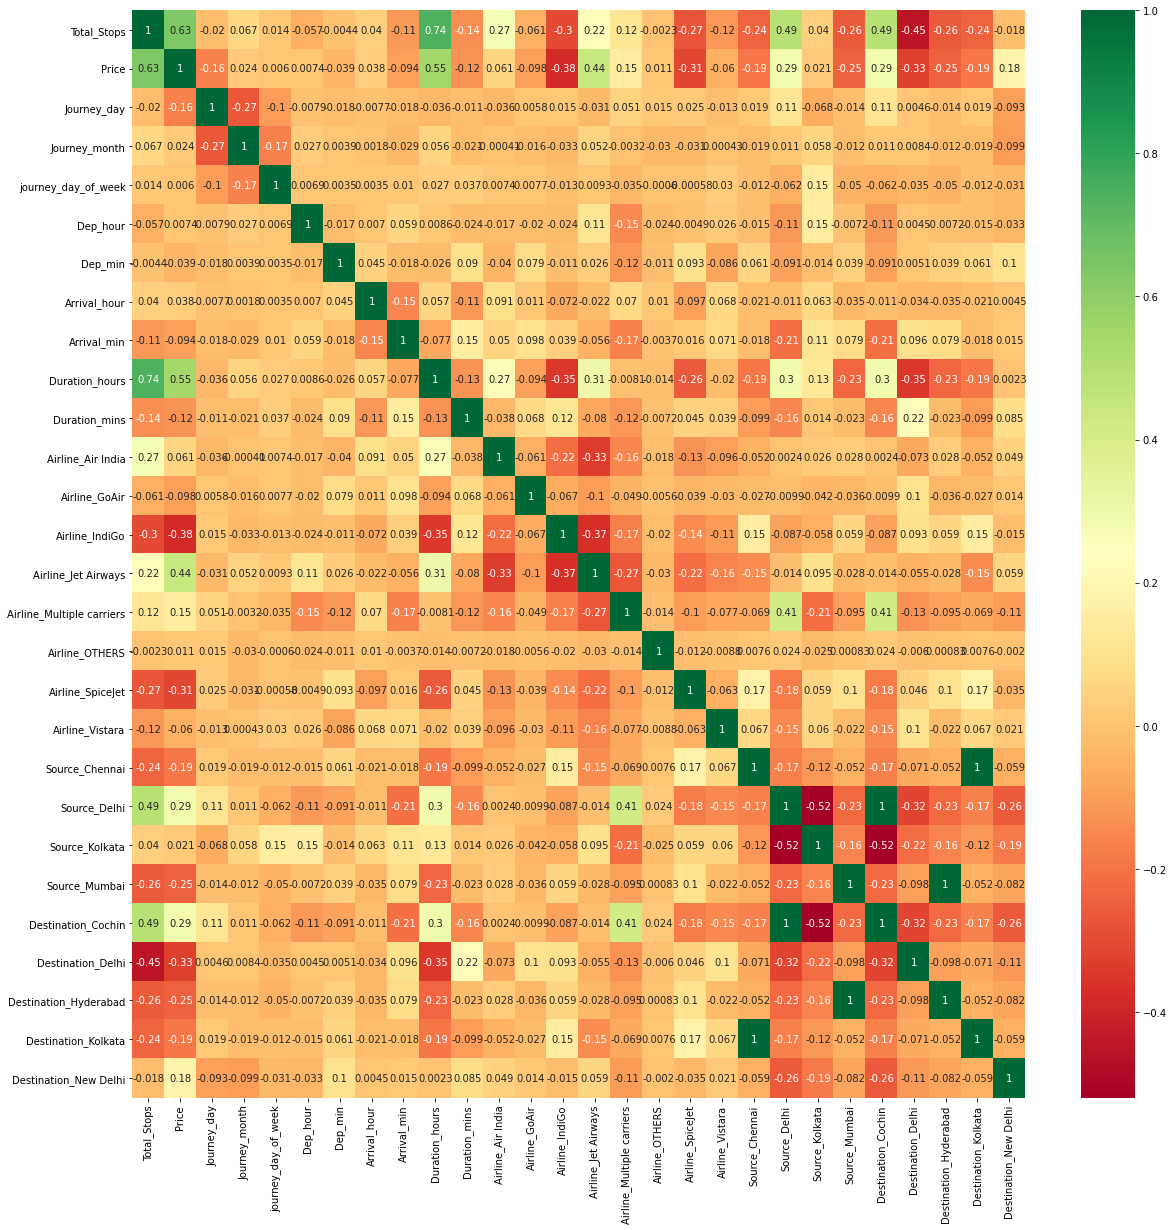

In [37]:
## drawing the heat map for the corr
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [38]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'journey_day_of_week', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_OTHERS', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [39]:
x = df.loc[:,['Total_Stops','Journey_day', 'Journey_month',
       'journey_day_of_week', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_OTHERS', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,4,9,2,4,0,6,50,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,6,3,2,8,30,11,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,6,9,4,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,27,5,0,12,50,21,0,8,10,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,2,6,6,3,6,50,7,40,24,50,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [40]:
y = df.iloc[:, 1]
y.head()

0     3943.0
1     4823.0
2     3210.0
3     7005.0
4    13381.0
Name: Price, dtype: float64

In [41]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [42]:
print(selection.feature_importances_)

[0.27667197 0.102107   0.06917297 0.03779063 0.02482518 0.02365542
 0.02143861 0.01898108 0.12788453 0.01659593 0.01149704 0.0021529
 0.0142268  0.13993761 0.02370242 0.00133908 0.00319844 0.00637544
 0.00048882 0.01048437 0.00548414 0.00794194 0.0105427  0.01364267
 0.00706825 0.00050281 0.02229124]


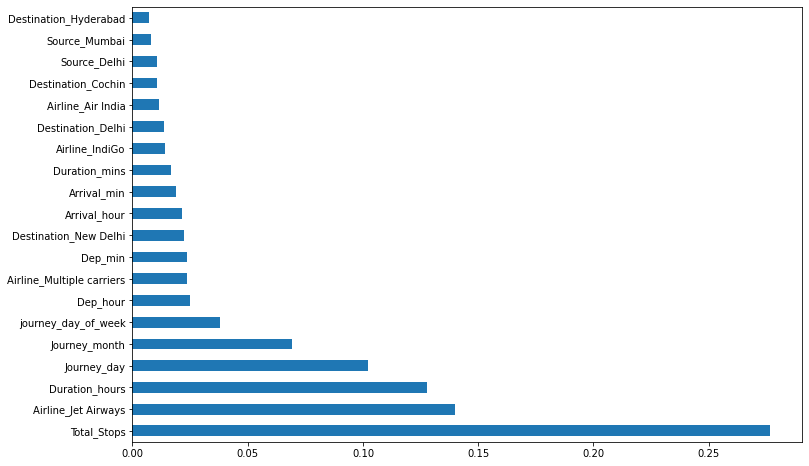

In [43]:
#plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# **FITTING MODEL USING RANDOM FOREST REGRESSION**

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap= True, max_depth= 100, n_estimators= 1000)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred = regressor.predict(x_val)

In [47]:
regressor.score(x_train, y_train)

0.9597954893919112

In [48]:
regressor.score(x_val, y_val)

0.8186966582463874

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


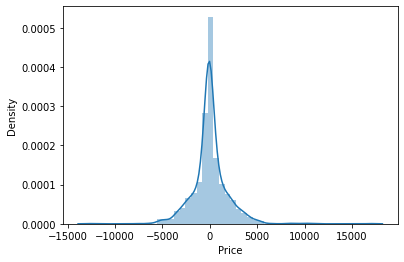

In [49]:
sns.distplot(y_val-y_pred)
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred)

3382267.2556889546

In [51]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(rmse)

1839.0941399746112


In [52]:
from sklearn import metrics
metrics.r2_score(y_val, y_pred)

0.8186966582463874

# **HYPERPARAMETER TUNING**

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [56]:
 #Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=12, n_jobs = 1)

In [57]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   4.0s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   4.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   4.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   4.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   9.9s
[CV] n_estimators=1200, min_samples_split=2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=100,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                              

In [58]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 800}

In [59]:
regressor = RandomForestRegressor(bootstrap= True, max_depth=25,max_features='auto',min_samples_leaf=2,min_samples_split=2, n_estimators= 800)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
hp_pred = regressor.predict(x_val)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_val, hp_pred))
print('MSE:', metrics.mean_squared_error(y_val, hp_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, hp_pred)))

MAE: 1149.599987415509
MSE: 3191463.9288311685
RMSE: 1786.4668843365578


# **TEST SET**

In [62]:
df_test = pd.read_csv('Test.csv')

In [63]:
#just copy paste all the pre processing done on the training set
print("Test data Info")
print("-"*75)
print(df_test.info())

print()
print()

print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

# EDA

# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey).dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"]).dt.month
df_test['journey_day_of_week'] = pd.to_datetime(df_test["Date_of_Journey"]).dt.dayofweek
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)
# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)
# Categorical data

print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 or 4 stops": 3}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
df_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2134 non-null   object
 1   Date_of_Journey  2134 non-null   object
 2   Source           2134 non-null   object
 3   Destination      2134 non-null   object
 4   Dep_Time         2134 non-null   object
 5   Arrival_Time     2134 non-null   object
 6   Duration         2134 non-null   object
 7   Total_Stops      2134 non-null   object
 8   Additional_Info  2134 non-null   object
dtypes: object(9)
memory usage: 150.2+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
A

In [64]:
df_test.shape

(2134, 27)

In [65]:
df.shape

(8533, 28)

In [66]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_OTHERS,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3943.0,4,9,2,4,0,6,50,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,4823.0,6,3,2,8,30,11,20,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,3210.0,6,9,4,19,35,21,5,1,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1,7005.0,27,5,0,12,50,21,0,8,10,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
4,2,13381.0,6,6,3,6,50,7,40,24,50,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [67]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,journey_day_of_week,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,OTHERS,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,5,12,3,15,5,20,20,5,15,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,15,3,4,18,5,21,10,3,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,24,6,0,11,45,4,25,16,40,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,21,6,4,9,0,11,25,2,25,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,27,4,5,14,25,16,55,2,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [68]:
x_test = df_test.iloc[:,:]

In [69]:
test_pred = regressor.predict(x_test)

In [70]:
test_pred

array([ 5573.77454117,  6669.64756895, 12998.94469963, ...,
       10243.58121081, 13087.37238014,  4580.69708581])

# **give all the values of the paramters and we can get the price.thank you!**